# Loading Data

In [36]:
import pandas as pd
df=pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


________________________

# Data Exploring

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# conclusion

### wrong types for:
- Order Date
- Ship Date	
- Postal Code	

________________________

In [39]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Conclusion

### for both Sales and Profit
- big differnce between min & max -> high std -> Outliers

_______________________

In [40]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [41]:
print(df.duplicated().sum())

0


# Conclusion

- No nulls or duplicates which is nice

___________________________________________

# Data Cleaning

In [42]:
# fixing the wrong types

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Postal Code'] = df['Postal Code'].astype(str)

In [43]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [44]:
# removing unnecessary columns 

df.drop(['Row ID'], axis=1, inplace=True)

________________________

# exploratory data analysis (EDA)

In [45]:
# Libraries & Common Styling

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")


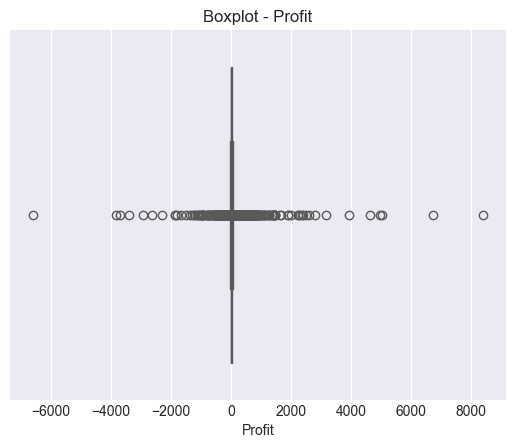

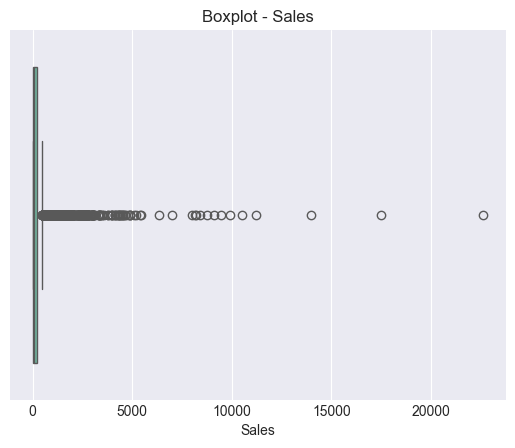

In [46]:
# Boxplot for Profit
sns.boxplot(x=df['Profit'])
plt.title("Boxplot - Profit")
plt.show()

# Boxplot for Sales
sns.boxplot(x=df['Sales'])
plt.title("Boxplot - Sales")
plt.show()


In [47]:
# Profit outliers
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df['Profit'] < lower) | (df['Profit'] > upper)]
print(f"number of outliers in Profit: {len(outliers)}")


number of outliers in Profit: 1881


# Profit distribution

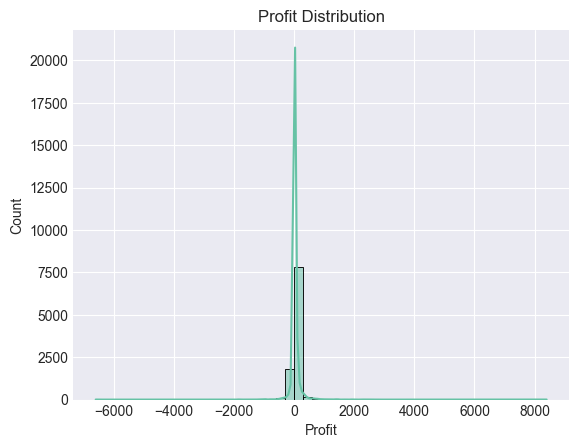

In [48]:
sns.histplot(df['Profit'], kde=True, bins=50)
plt.title("Profit Distribution")
plt.show()

# Conclusion

- Financial outcomes for most transactions cluster around zero, with significant numbers of extreme profits and losses acting as outliers.

____________________

# Sales distribution

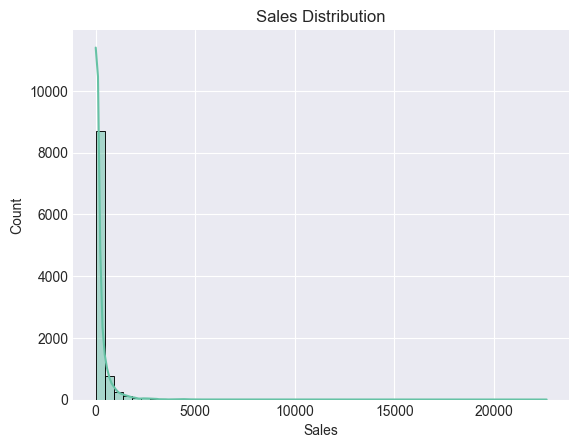

In [49]:
sns.histplot(df['Sales'], kde=True, bins=50)
plt.title("Sales Distribution")
plt.show()

# Conclusion

- Sales are overwhelmingly concentrated at low values, yet a few very large sales significantly contribute to the overall revenue, indicating a highly right-skewed distribution.

________________

# Impact of Discount on Profit

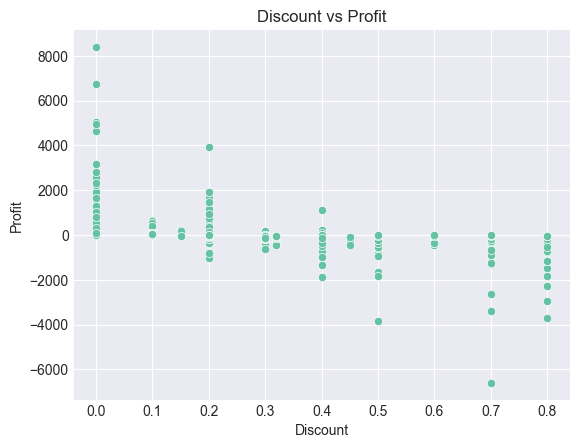

In [50]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


# Conclusion

- The more you discount, the less profit you make; conversely, no discount often leads to the highest profits.

__________________________

# The best selling products

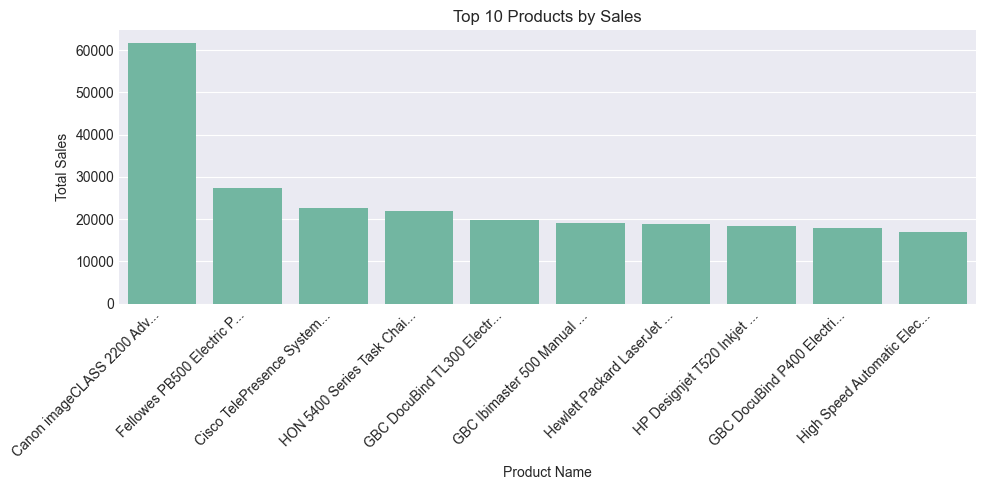

In [51]:
top_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Product names are kinda long so...
short_names = top_sales.index.str.slice(0, 25) + '...'

plt.figure(figsize=(10,5))
sns.barplot(x=short_names, y=top_sales.values)

plt.title('Top 10 Products by Sales')
plt.ylabel("Total Sales")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusion

- The "Canon imageCLASS 2200 Advanced Copier" dominates sales, significantly surpassing other top-selling office and tech products.

_______________________

# The most profitable products

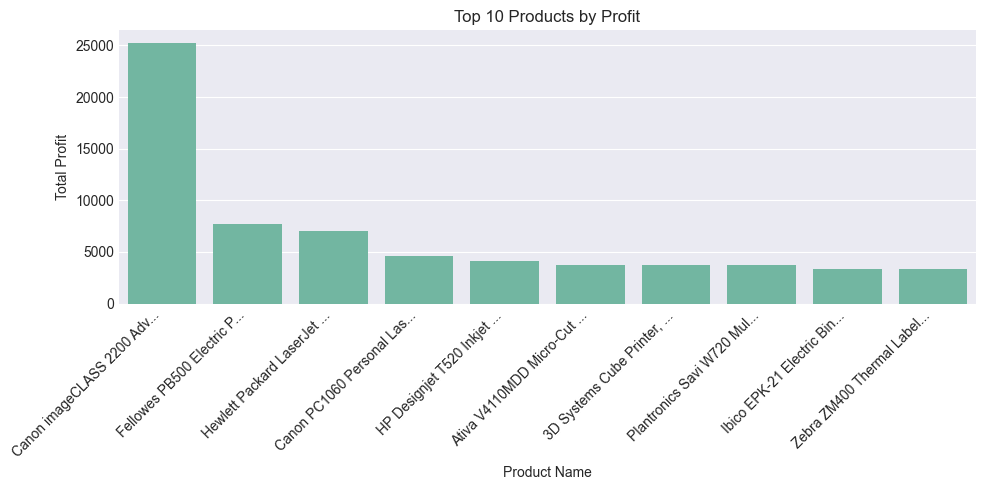

In [52]:
top_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)


short_names = top_profit.index.str.slice(0, 25) + '...'

plt.figure(figsize=(10,5))
sns.barplot(x=short_names, y=top_profit.values)

plt.title('Top 10 Products by Profit')
plt.ylabel("Total Profit")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusion

- The "Canon imageCLASS 2200 Advanced Copier" is the dominant profit driver, but also highlighting that high sales don't always equate to high profitability for all products.

_____________

# The best customers

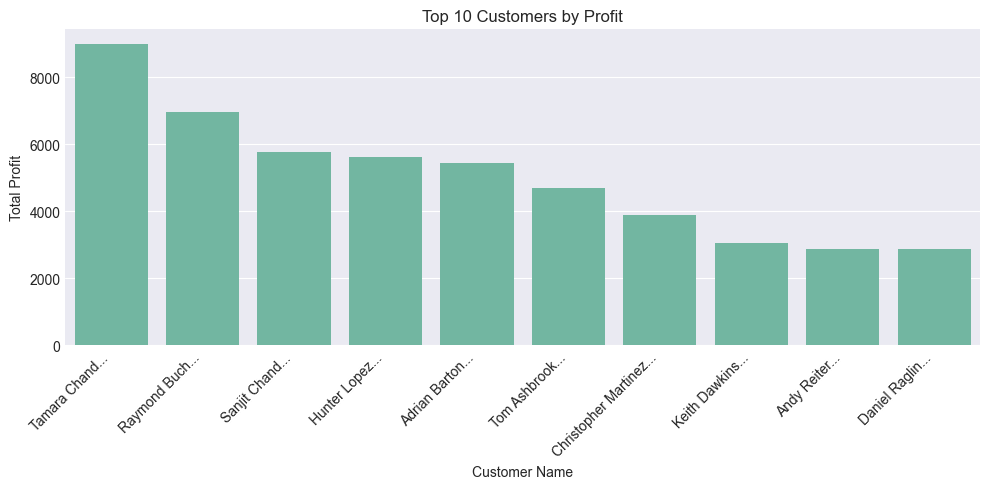

In [64]:
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

short_names = top_customers.index.str.slice(0, 20) + '...'

plt.figure(figsize=(10,5))
sns.barplot(x=short_names, y=top_customers.values)

plt.title('Top 10 Customers by Profit')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusion

- Getting most of our profit comes from a small group of key customers, so they're really important to our business.

________________

# Profit by Category

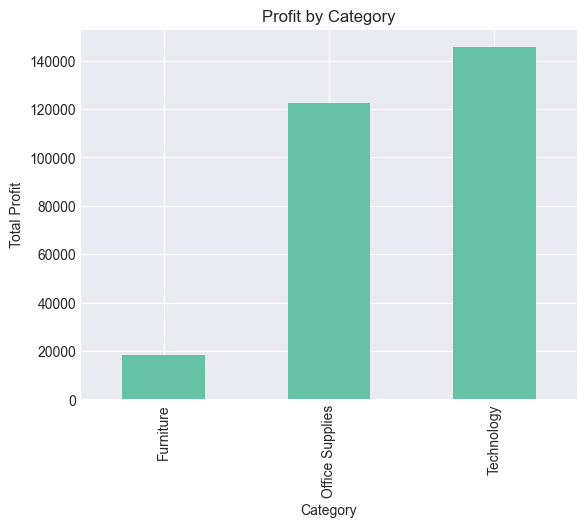

In [53]:
df.groupby('Category')['Profit'].sum().plot(kind='bar', title='Profit by Category')
plt.ylabel("Total Profit")
plt.show()

# Conclusion

- Technology and Office Supplies are the primary profit drivers, while Furniture contributes significantly less to overall profit.

___________________________

# Profit by Sub-Category

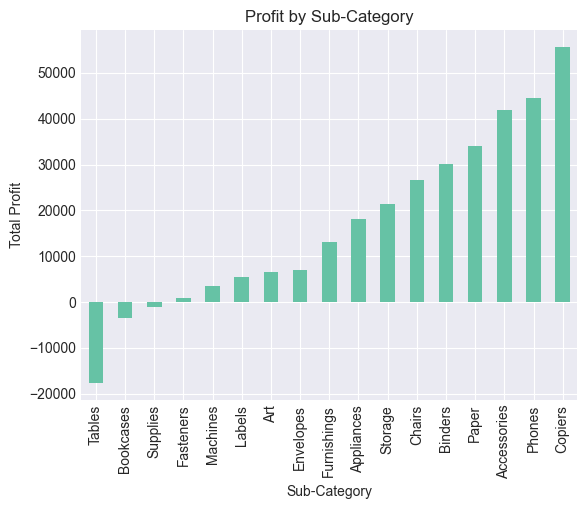

In [54]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='bar', title='Profit by Sub-Category')
plt.ylabel("Total Profit")
plt.show()

# Conclusion

- Profitability varies greatly by sub-category; **Tables** and **Bookcases** are major loss drivers, while **Copiers**, **Phones**, and **Accessories** are key profit generators.

________________________

# Profit by Region

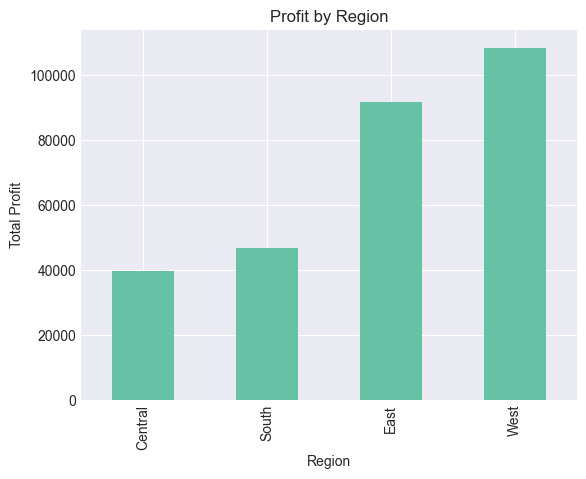

In [55]:
df.groupby('Region')['Profit'].sum().sort_values().plot(kind='bar', title='Profit by Region')
plt.ylabel("Total Profit")
plt.show()


# Conclusion

- The **West** and **East** regions are the main profit contributors, while the **South** and **Central** regions show significantly lower profitability.

_______________

# Monthly Sales Trend

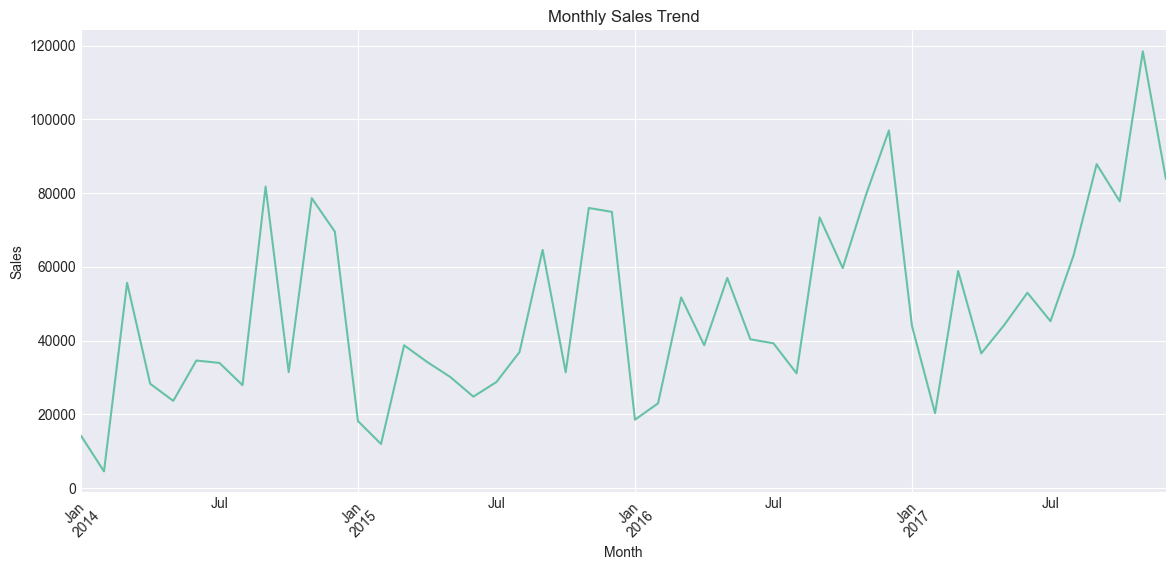

In [57]:
df['Month'] = df['Order Date'].dt.to_period('M')
df.groupby('Month')['Sales'].sum().plot(figsize=(14,6), title='Monthly Sales Trend')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


# Conclusion

- Sales go up overall each year, but always jump way up at the end of the year and then drop sharply at the start.

________________

# Profit by Segment

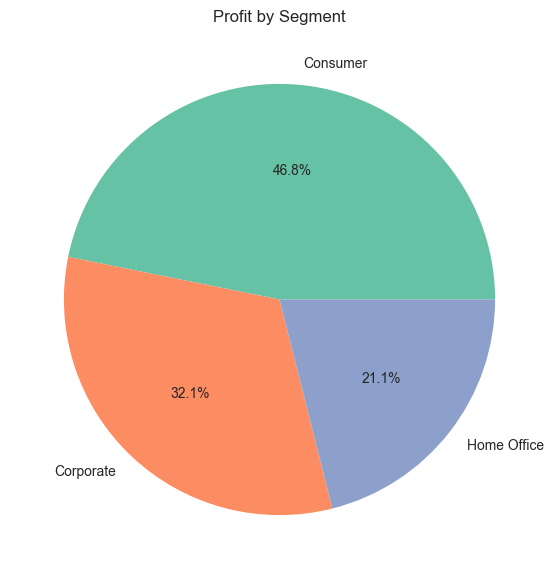

In [58]:
df.groupby('Segment')['Profit'].sum().plot(kind='pie', autopct='%1.1f%%', title='Profit by Segment', figsize=(7,7))
plt.ylabel('')
plt.show()


# Conclusion

- The **Consumer and Corporate segments are the dominant profit contributors**, while the Home Office segment provides a smaller share.

_______________

# Quantity vs Profit

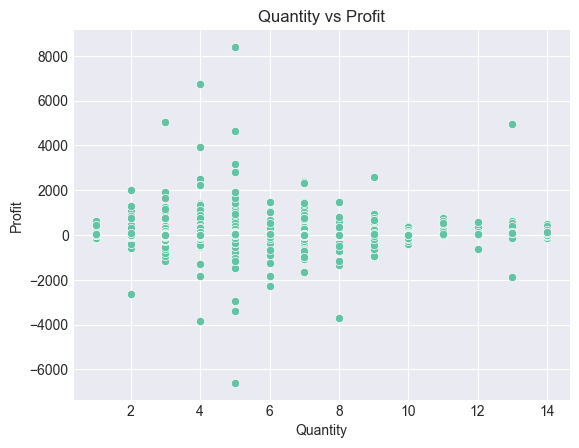

In [59]:
sns.scatterplot(data=df, x='Quantity', y='Profit')
plt.title("Quantity vs Profit")
plt.show()


# Conclusion

- Selling a lot of items in one go doesn't always mean more money; the biggest profits often come from selling just a few items, showing other things matter more than just quantity.

___________

Text(0.5, 1.0, 'Correlation Heatmap')

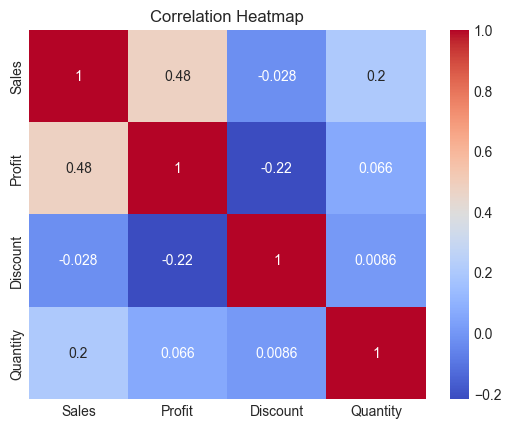

In [62]:
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


# Conclusion

- Giving bigger discounts hurts profits, even though more sales generally lead to more profit. Selling more items doesn't guarantee bigger profits.